In [ ]:
!nvidia-smi

Tue Apr  2 19:15:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
!pip install --upgrade kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d koryakinp/chess-positions

100% 4.00G/4.01G [00:38<00:00, 198MB/s]
100% 4.01G/4.01G [00:38<00:00, 113MB/s]


In [ ]:
!unzip chess-positions.zip -d /content/Datas

Streaming output truncated to the last 5000 lines.
  inflating: /content/Datas/train/b1K5-6rB-5k2-5r2-1b6-8-5n2-8.jpeg  
  inflating: /content/Datas/train/b1K5-8-3k4-3p4-8-3B1r2-1b6-4N3.jpeg  
  inflating: /content/Datas/train/b1K5-8-8-2p3p1-5k2-8-8-7R.jpeg  
  inflating: /content/Datas/train/b1K5-8-8-8-2qr1N2-8-6nk-3b4.jpeg  
  inflating: /content/Datas/train/b1K5-r7-4kb2-R4Q1p-b7-1pb5-5P2-8.jpeg  
  inflating: /content/Datas/train/b1KB4-2B5-3p4-1BB5-3k1n2-p1r5-2n5-5r1q.jpeg  
  inflating: /content/Datas/train/b1Kb4-6P1-n2Q3k-8-4N1n1-2b2P2-8-8.jpeg  
  inflating: /content/Datas/train/b1Kr4-8-q7-8-1bB5-8-2k1P1RR-8.jpeg  
  inflating: /content/Datas/train/b1Kr4-P7-R2R4-1b3B2-3Pr3-4Nk2-8-4R3.jpeg  
  inflating: /content/Datas/train/b1N1k3-K1q5-1P1B4-2R5-3N3Q-3brP2-8-1B1n4.jpeg  
  inflating: /content/Datas/train/b1N1n1q1-R5RQ-1N2r2P-3n4-3k4-8-3n3N-K7.jpeg  
  inflating: /content/Datas/train/b1N1qn2-1P5k-b3K1p1-8-2B4n-7N-5B2-1b2B3.jpeg  
  inflating: /content/Datas/train/b1N1r1k1-2R5-1r2b

### Importing Libraries


In [ ]:

import re
import cv2
import glob
import random as rd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from imutils import paths
%matplotlib inline

### EDA analysis

In [ ]:

#Define train path and test path
train_path = glob.glob(r"/content/Datas/train/*.jpeg")
test_path = glob.glob(r"/content/Datas/test/*.jpeg")

#Shuffle train and test samples
rd.shuffle(train_path)
rd.shuffle(test_path)

#Decide the number of train and test samples
train_size = 8000
test_size = 2000
train = train_path[:train_size]
test= test_path[:test_size]
print(len(train))
print(len(test))

# Piece_type = ['King','Queen','Rook','Bishop','Knight','Pawn']|
# Capital = White, Normal = Black
piece_symbols = 'prbnkqPRBNKQ'


8000
2000



### Extracting labels

In [ ]:
def get_image_FEN_label(image_path):
    fen_label= image_path.replace('.jpeg', '').split('/')[-1]
    fen_label = fen_label.replace('train\\', '')
    return fen_label

### Displaying Random Sample

/content/Datas/train/n7-2KP4-5Qk1-8-8-3b4-8-1r3b2.jpeg
n7-2KP4-5Qk1-8-8-3b4-8-1r3b2


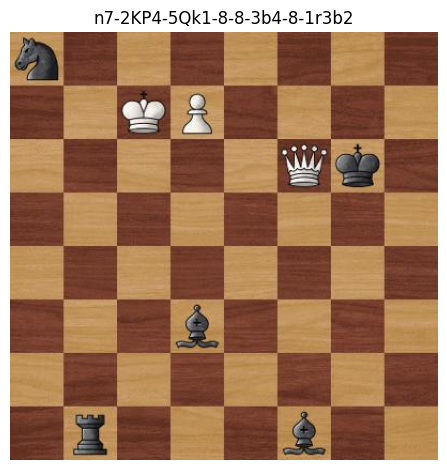

In [ ]:
rand = np.random.randint(0, train_size)
img_path = train[rand]
print(img_path)
img_moves = get_image_FEN_label(img_path)
print(img_moves)
img_rand = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_rand, cv2.COLOR_BGR2RGB))
plt.title(img_moves)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
!pip install chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.6 MB/s eta 0:00:00


### Importing Chess libraries and printing Labels.

In [ ]:
import chess.svg
import chess
print("The FEN notation of the image is: ", img_moves)
board = chess.Board(img_moves.replace('-', '/'))
chess.svg.board(board, size=300)

### Displaying a bunch of pieces of data

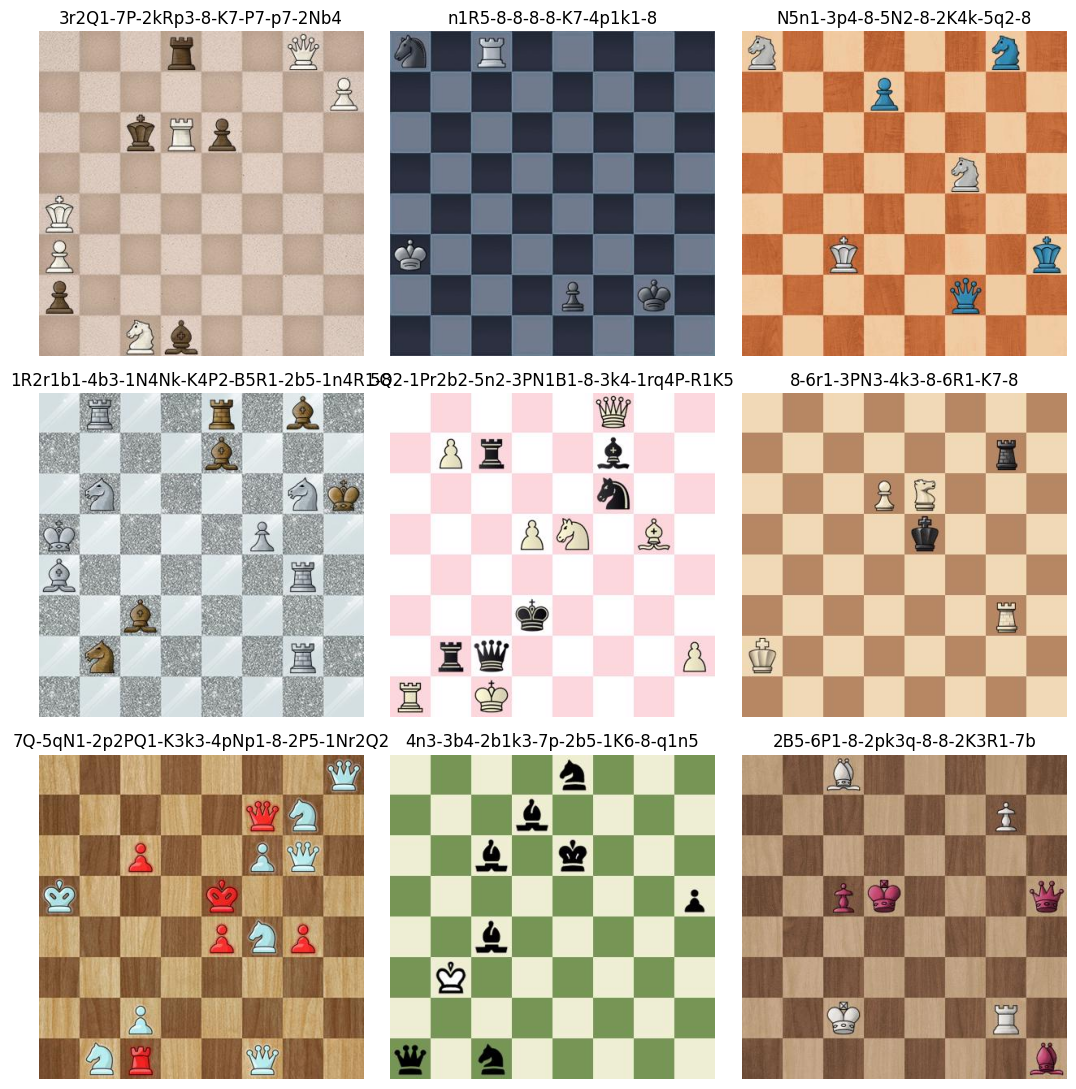

In [ ]:
samples =rd.sample(train, 9)
fig = plt.figure(figsize=(11, 11))
columns = 3
rows = 3
for i, img in zip(range(1, columns*rows +1),samples ):
    fig.add_subplot(rows, columns, i)
    img_moves =  get_image_FEN_label(img)
    img = cv2.imread(img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(img_moves)
    plt.tight_layout()

plt.show()

### Label Distribution, all labels are unique

In [ ]:
labels = [get_image_FEN_label(img) for img in train]
set_labels = set(labels)
print("Number of labels {} is equal to number of images {}".format(len(set_labels), len(train)))

Number of labels 8000 is equal to number of images 8000


### Analyzing picture dimensions and ratio (it has same ratio, width and height for all images)

Selected Width X heights: 400X400


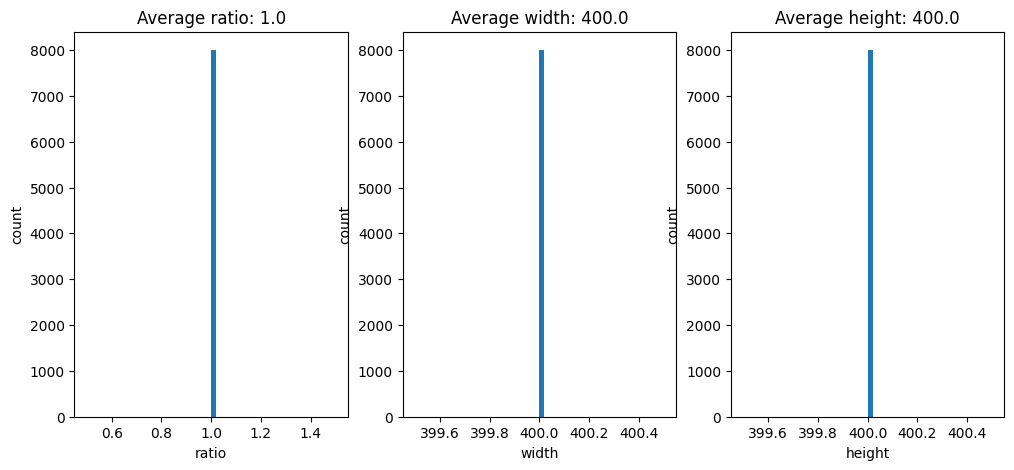

In [ ]:
ratios = []
widths = []
heights = []

for img in train:
  img= cv2.imread(img)
  ratios.append(img.shape[1] / img.shape[0])
  heights.append(img.shape[0])
  widths.append(img.shape[1])

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 5))

ax1.hist(ratios, bins=50)
ax1.set_xlabel('ratio')
ax1.set_ylabel('count')
ax1.set_title('Average ratio: {}'.format(np.mean(ratios)))

ax2.hist(widths, bins=50)
ax2.set_xlabel('width')
ax2.set_ylabel('count')
ax2.set_title('Average width: {}'.format(np.mean(widths)))

ax3.hist(heights, bins=50)
ax3.set_xlabel('height')
ax3.set_ylabel('count')
ax3.set_title('Average height: {}'.format(np.mean(heights)))

print("Selected Width X heights: {}X{}".format(int(np.mean(widths)) ,int(np.mean(heights))))

### Data Preprcoessing

#### Resizing Scaling and normalization

In [ ]:
def preprocess_some_images(img_paths, width, height):
  resized_imgs = []
  for img_path in img_paths:
    # change to Grey scal
    # img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.imread(img_path, cv2.COLOR_BGR2GRAY)

    # resize the image to the desired size
    gray_image = cv2.resize(img, (width, height))

    # Normalize the image
    gray_image =(gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))

    # add to the list
    resized_imgs.append(gray_image)

  return resized_imgs
preprocessed_imgs= preprocess_some_images(samples,240,240)


#### New image H*W pixels

In [ ]:
"{}X{}".format(preprocessed_imgs[0].shape[0],preprocessed_imgs[0].shape[1])


'240X240'

#### Display new image shape



In [ ]:
preprocessed_imgs[0].shape


(240, 240, 3)

#### Data display, grey scale, Resized and Normalized

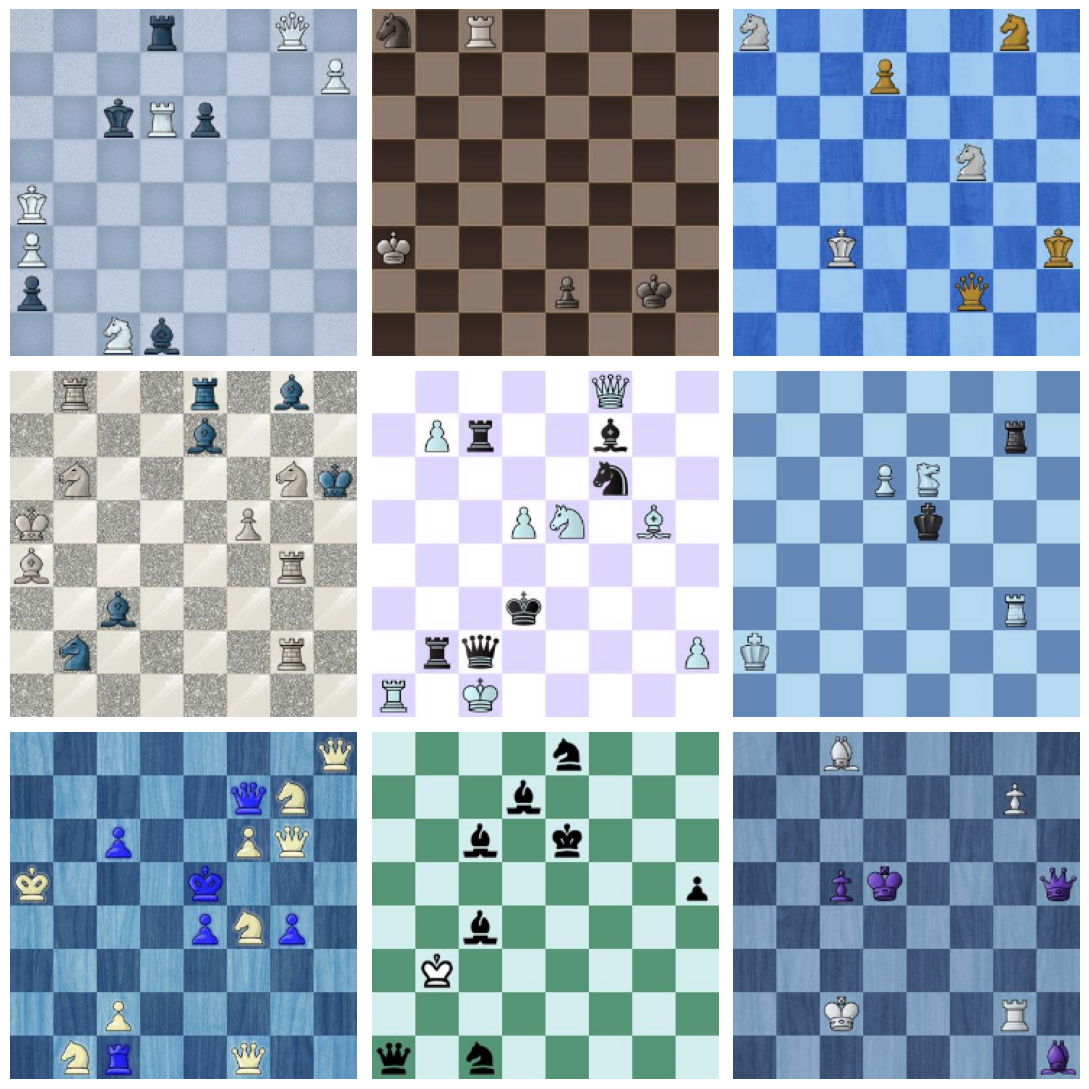

In [ ]:
fig = plt.figure(figsize=(11, 11))
columns = 3
rows = 3
for i, img in zip(range(1, columns*rows +1), preprocessed_imgs):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
plt.show()

### PCA analysis

(720, 720)

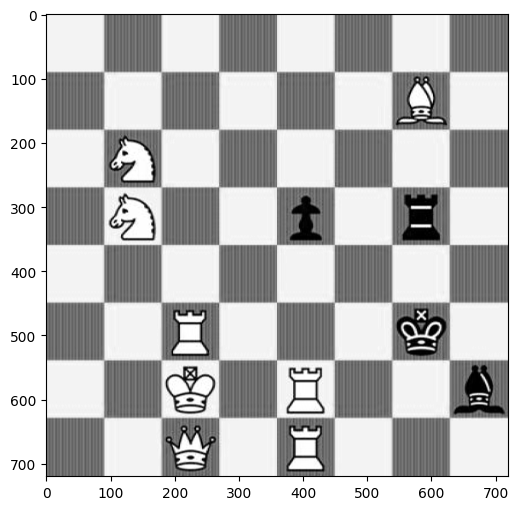

In [ ]:
img = np.array(cv2.imread(samples[8]))
new_img=img.reshape(img.shape[0], (img.shape[1]*img.shape[2]))
new_img= cv2.resize(new_img, (720, 720),interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(6, 6))
plt.imshow(new_img, cmap='gray')
new_img.shape

### PCA analysis - Component Analysis

Using 15 components reservers 96.3% of the features


Text(0, 0.5, 'Cumulative_explained_variance')

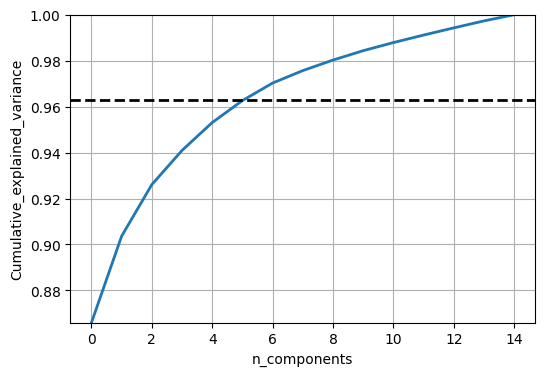

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.n_components = 15
img_transformed = pca.fit_transform(new_img)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

reserved =np.round(np.sum(pca.explained_variance_ratio_),3)*100

print("Using {} components reservers {}% of the features".format(pca.n_components,reserved))

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylim(min(cum_var_explained),1)
plt.axhline(y=reserved/100.0, linestyle='--', color='k', linewidth=2)
plt.ylabel('Cumulative_explained_variance')

### PCA analysis Results

Text(0.5, 1.0, 'After PCA image')

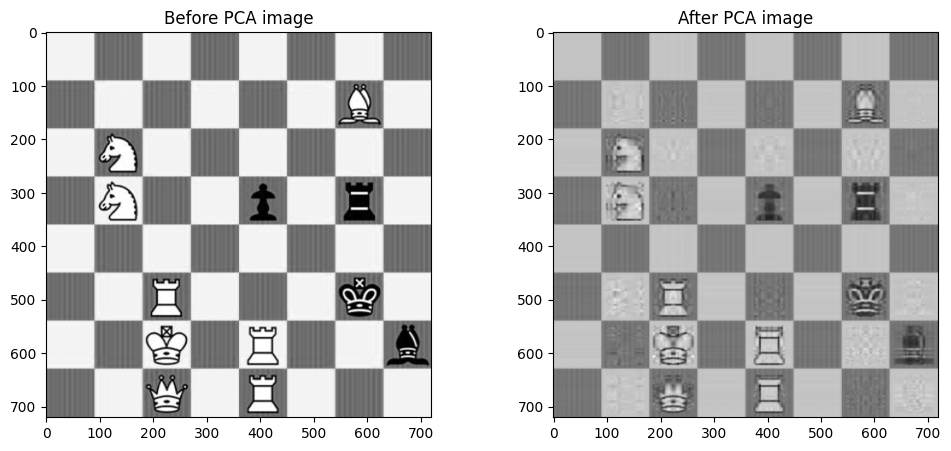

<Figure size 600x600 with 0 Axes>

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))
img = np.array(cv2.imread(samples[8]))##np.array(preprocessed_imgs[0],copy=True)
new_img=img.reshape(img.shape[0], (img.shape[1]*img.shape[2]))
new_img= cv2.resize(new_img, (720, 720),interpolation=cv2.INTER_CUBIC)
ax1.imshow(new_img, cmap='gray')
ax1.set_title("Before PCA image")

plt.figure(figsize=(6, 6))
temp = pca.inverse_transform(img_transformed)
temp = np.reshape(temp, (720,720))
ax2.imshow(temp, cmap='gray')
ax2.set_title("After PCA image")

In [ ]:
pip install visualkeras

#### On the chessboard pieces

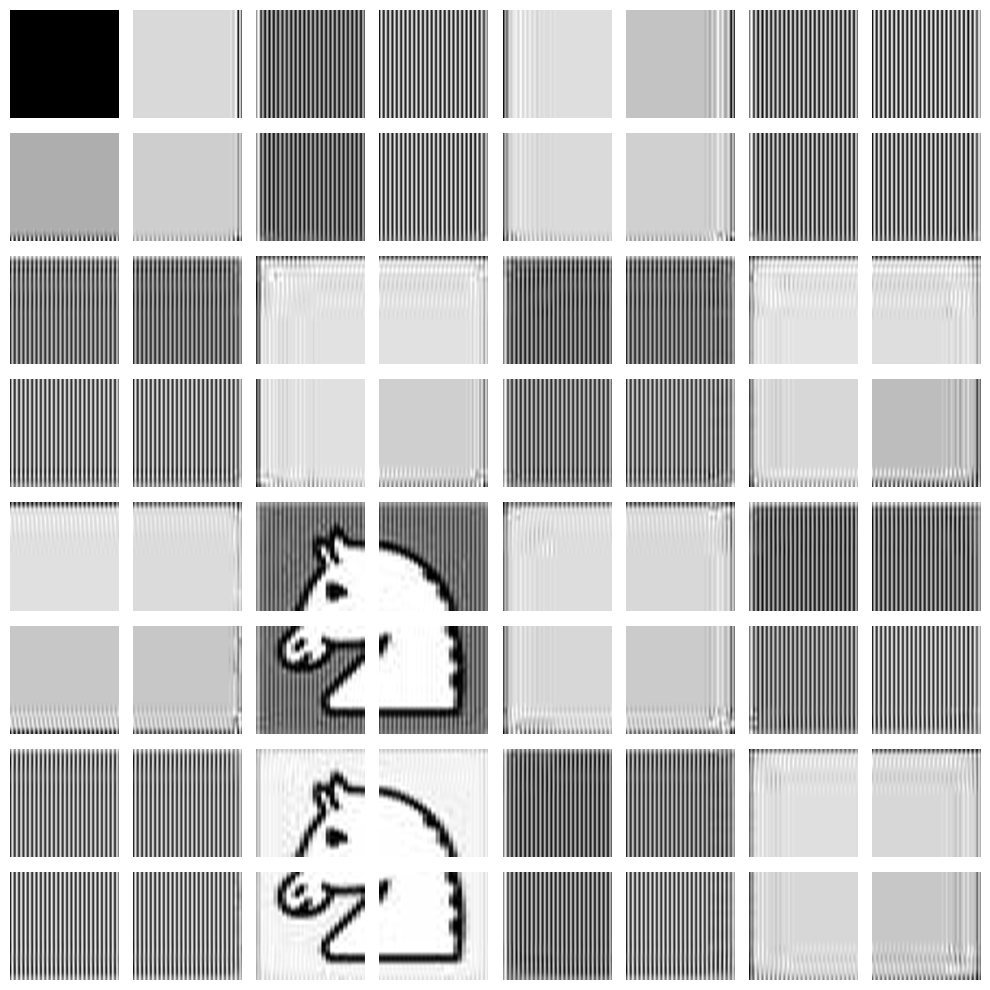

(64, 720, 720)

In [ ]:
def image_to_squares_pca(img,heights,widths):
  squares = []
  for i in range(0,8):
    for j in range(0,8):
      new_img =img[i*heights//8:i*heights//8+heights//8,j*widths//8:j*widths//8+widths//8]
      new_img=new_img.reshape(new_img.shape[0], (new_img.shape[1]*new_img.shape[2]))
      new_img= cv2.resize(new_img, (720, 720),interpolation=cv2.INTER_CUBIC)
      squares.append(new_img)
  return np.array(squares)

img = np.array(cv2.imread(samples[8]))
sqaures= image_to_squares_pca(img,200,200)
fig = plt.figure(figsize=(10, 10))
columns = 8
rows = 8
for i, img in zip(range(1, columns*rows +1),sqaures):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
plt.show()
sqaures.shape

### Feature Engineering

In [ ]:
def image_to_squares(img,heights,widths):
  squares = []
  for i in range(0,8):
    for j in range(0,8):
      squares.append(img[i*heights//8:i*heights//8+heights//8,j*widths//8:j*widths//8+widths//8])
  return np.array(squares)

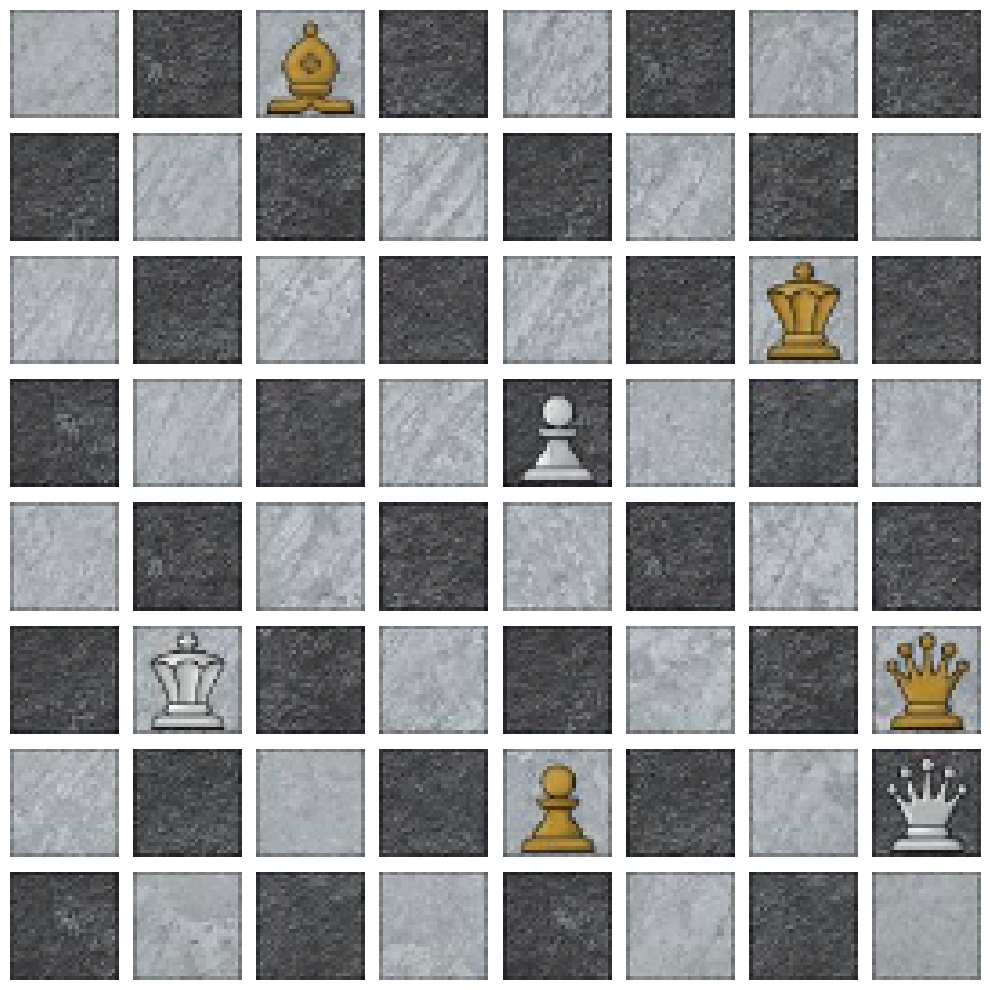

(64, 30, 30, 3)

In [ ]:
sqaures= image_to_squares(preprocessed_imgs[0],240,240)
fig = plt.figure(figsize=(10, 10))
columns = 8
rows = 8
for i, img in zip(range(1, columns*rows +1),sqaures):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
plt.show()
sqaures.shape

### Create a function to the complete preprocessing and sqaures division of one sample of the data


In [ ]:
def preprocess_image(img_path):
    height =240
    width =240

    # change to Grey scal
    img = cv2.imread(img_path, cv2.COLOR_BGR2GRAY)

    # resize the image to the desired size
    gray_image = cv2.resize(img, (width, height))

    # Normalize the image
    gray_image =(gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))

    squares = image_to_squares(gray_image,height,width)
    return squares

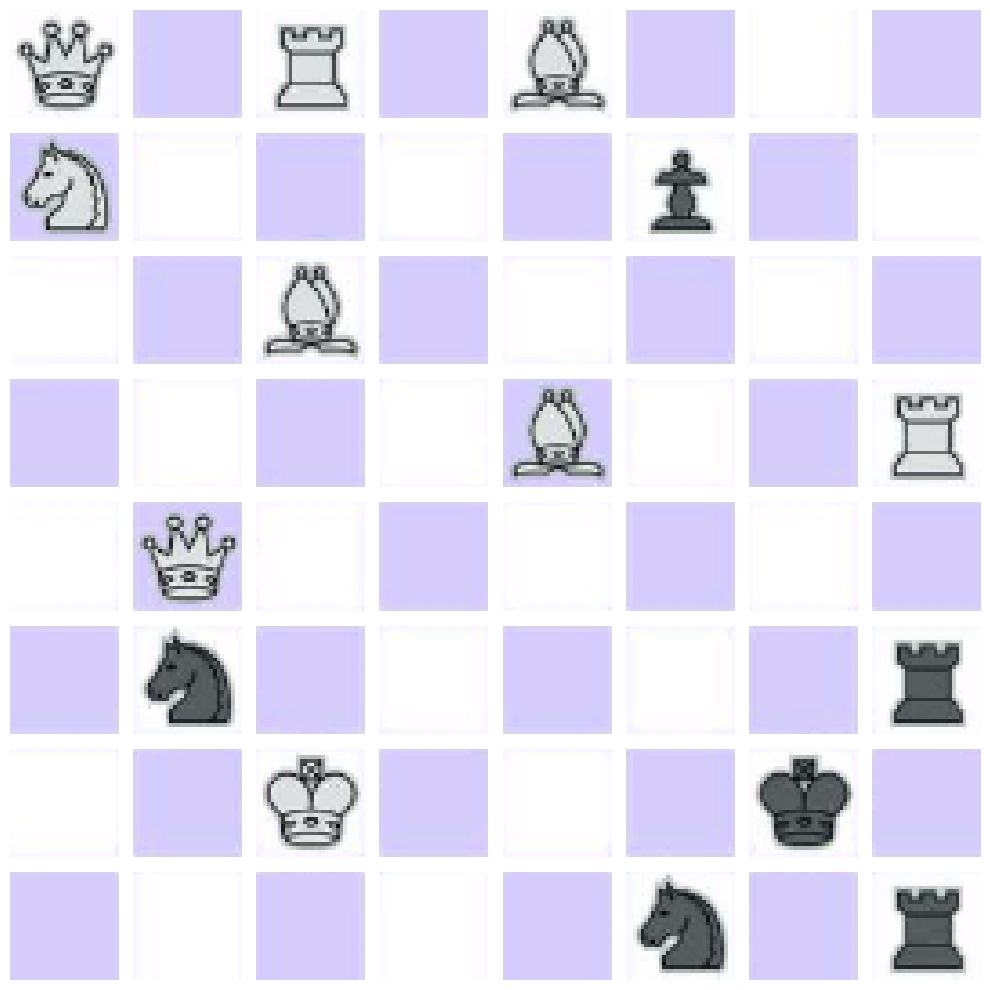

(64, 30, 30, 3)

In [ ]:
sqaures=preprocess_image(train[444])

fig = plt.figure(figsize=(10, 10))
columns = 8
rows = 8
for i, img in zip(range(1, columns*rows +1),sqaures):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
plt.show()
sqaures.shape

### FEN enocder decoder functions

In [ ]:
def onehot_from_fen(fen):
    eye = np.eye(13)
    output = np.empty((0, 13))
    fen = re.sub('[-]', '', fen)

    for char in fen:
        if char in '12345678':
              output = np.append(output, np.tile(eye[12], (int(char), 1)), axis=0)
        else:
              if char in piece_symbols:
                 idx = piece_symbols.index(char)
                 output = np.append(output, eye[idx].reshape((1, 13)), axis=0)
              else:
            # Handle the case when char is not found in piece_symbols
            # For example, you might want to skip this character or handle it differently.
                pass

    return output


def fen_from_onehot(one_hot):
    output = ''
    for j in range(8):
        for i in range(8):
            if(one_hot[j][i] == 12):
                output += ' '
            else:
                output += piece_symbols[one_hot[j][i]]
        if(j != 7):
            output += '-'

    for i in range(8, 0, -1):
        output = output.replace(' ' * i, str(i))

    return output

### Create a function divide the data into training and testing sets


In [ ]:
def train_gen(features):
    for i, img in enumerate(features):
        y = onehot_from_fen(get_image_FEN_label(img))
        x = preprocess_image(img)
        yield x, y

def pred_gen(features):
    for i, img in enumerate(features):
        y = onehot_from_fen(get_image_FEN_label(img))
        x = preprocess_image(img)
        yield x, y

### Modelling and model training


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Add a convolutional layer
model = Sequential()
model.add(Convolution2D(32, (3, 3),activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Convolution2D(16, (5, 5),activation='relu'))
model.add(Flatten())
model.add(Dropout(0.35))
model.add(Dense(13, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 16)          12816     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 13)                5213      
                                                        

### Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Fitting parameters

In [ ]:


hist = model.fit_generator(train_gen(train), steps_per_epoch=250, epochs=30,validation_data=pred_gen(test), validation_steps=30)


Epoch 1/30
250/250 [==============================] - 6s 7ms/step - loss: 0.5896 - accuracy: 0.8488 - val_loss: 0.4333 - val_accuracy: 0.9234
Epoch 2/30
250/250 [==============================] - 2s 7ms/step - loss: 0.2786 - accuracy: 0.9206 - val_loss: 0.1522 - val_accuracy: 0.9625
Epoch 3/30
250/250 [==============================] - 2s 6ms/step - loss: 0.1603 - accuracy: 0.9551 - val_loss: 0.0661 - val_accuracy: 0.9823
Epoch 4/30
250/250 [==============================] - 2s 7ms/step - loss: 0.1128 - accuracy: 0.9706 - val_loss: 0.0775 - val_accuracy: 0.9771
Epoch 5/30
250/250 [==============================] - 2s 7ms/step - loss: 0.0746 - accuracy: 0.9784 - val_loss: 0.0506 - val_accuracy: 0.9833
Epoch 6/30
250/250 [==============================] - 2s 9ms/step - loss: 0.0618 - accuracy: 0.9827 - val_loss: 0.0393 - val_accuracy: 0.9891
Epoch 7/30
250/250 [==============================] - 2s 10ms/step - loss: 0.0546 - accuracy: 0.9835 - val_loss: 0.0350 - val_accuracy: 0.9880
Epoch

In [ ]:
model.save("content/datas/chess_model.h5")

### Model evaluation and model training

### Model evaluation - Loss

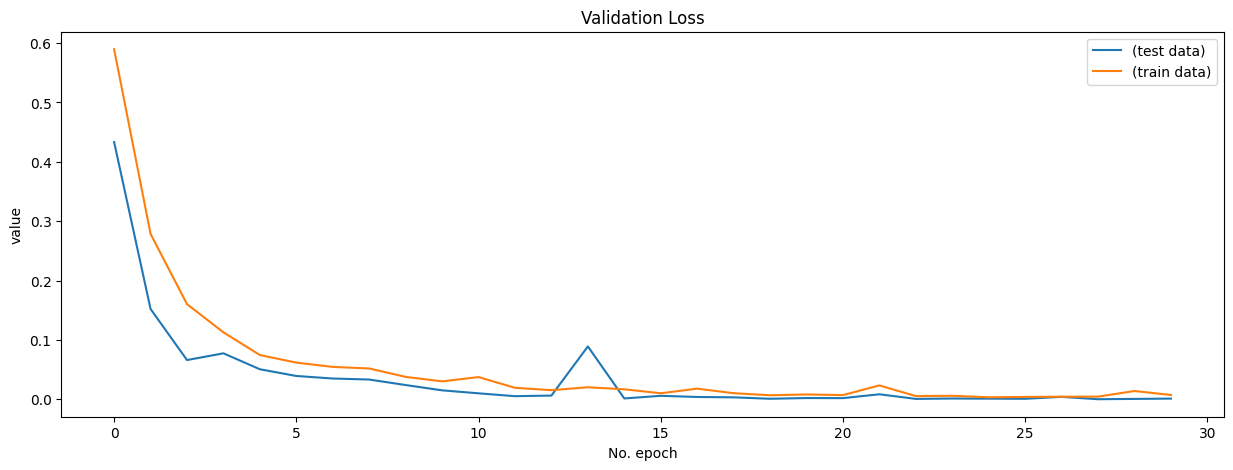

In [ ]:
fig = plt.figure(figsize=(15, 5))
plt.plot(hist.history['val_loss'], label='(test data)')
plt.plot(hist.history['loss'], label='(train data)')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.title('Validation Loss')
plt.show()

### Model evaluation - accuracy

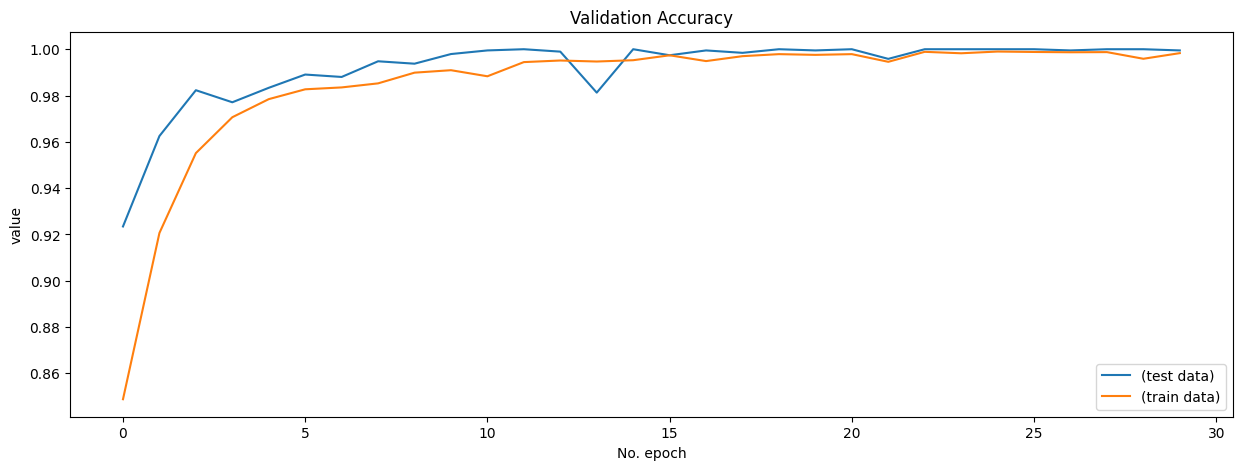

In [ ]:
fig = plt.figure(figsize=(15, 5))

plt.plot(hist.history['val_accuracy'], label='(test data)')
plt.plot(hist.history['accuracy'], label='(train data)')

plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.title('Validation Accuracy')
plt.show()


### Prediction

In [ ]:
res = (
  model.predict_generator(pred_gen(test), steps=test_size)
  .argmax(axis=1)
  .reshape(-1, 8, 8)
)
# Assuming you have already trained your CNN model, and it's stored in the variable 'model'



### Model-evaluation- All metrics

In [ ]:
pred_fens = np.array([fen_from_onehot(one_hot) for one_hot in res])
test_fens = np.array([get_image_FEN_label(fn) for fn in test])

final_accuracy = 100*(pred_fens == test_fens).astype(float).mean()

print("Testing Accuracy: {:1.2f}%".format(final_accuracy))

Testing Accuracy: 97.40%


In [ ]:
print("\nConfusion Matrix:\n------------------------")
confusion_matrix(test_fens, pred_fens)


Confusion Matrix:
------------------------


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
model.save("content/datas/chess_model.h5")

In [ ]:
import matplotlib.image as mpimg
def display_with_predicted_fen(image):
    plt.figure(figsize=(5,5))
    pred = model.predict(preprocess_image(image)).argmax(axis=1).reshape(-1, 8, 8)
    fen = fen_from_onehot(pred[0])
    imgplot = plt.imshow(mpimg.imread(image))
    plt.axis('off')
    plt.title(fen)
    plt.show()
    return fen


2/2 [==============================] - 0s 11ms/step


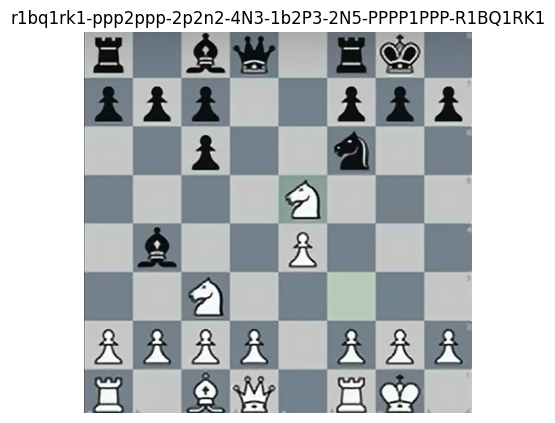

r1bq1rk1/ppp2ppp/2p2n2/4N3/1b2P3/2N5/PPPP1PPP/R1BQ1RK1


In [ ]:
image_path = "/content/test_exam.png"

tstimg = cv2.imread(image_path)
tstimg = cv2.resize(tstimg, (400, 400))
# cv2.imwrite("/content/testing_conf.jpg", tstimg)
predicted_fen_score=display_with_predicted_fen(image_path)
print("predicted FEN :",predicted_fen_score)


In [ ]:
chess.svg.board(board, size=300)

In [ ]:
mask = (pred_fens != test_fens)
predicted_outliers=pred_fens[mask]
outliers=test_fens[mask]
print("Number of outliers: ",len(outliers))